In [22]:
%config IPCompleter.greedy=True

# Clasificacion de prendas de vestir

<img src="FashionMNISTclases.png" width=600>

In [23]:
import matplotlib.pyplot as plt           # Librería para graficar
import numpy as np                        # Librería para cálculos matemáticos con arreglos

# Componentes de keras con tensorflow 2.0
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras import optimizers, backend
import tensorflow.keras.utils as np_utils
from tensorflow.keras.callbacks import ModelCheckpoint

from tensorflow.keras.datasets import fashion_mnist  # Función para descargar la base de datos

In [2]:
# Obtencion de las imágenes y sus etiquetas
# La función load_data() da como respuesta los grupos de entrenamiento y test por separado
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
print('Las imágenes del conjunto x_train:', x_train.shape)
print('Las etiquetas del conjunto y_train:', y_train.shape)
print('Las imágenes del conjunto x_test:', x_test.shape)
print('Las etiquetas del conjunto y_test:', y_test.shape)

Las imágenes del conjunto x_train: (60000, 28, 28)
Las etiquetas del conjunto y_train: (60000,)
Las imágenes del conjunto x_test: (10000, 28, 28)
Las etiquetas del conjunto y_test: (10000,)


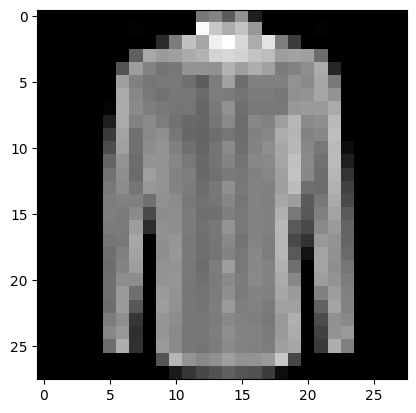

La imagen de entrenamiento 3000, corresponde con la etiqueta: 6


In [4]:
# Inspección visual de los datos
# Vamos a graficar algunas de las imégenes del dataset.
# EJERCICIO
# Cambiar de numero de imagen y visualiza a que clase pertenece
n_imagen = 3000 
etiqueta = y_train[n_imagen]
plt.imshow(x_train[n_imagen], cmap='gray')
plt.show()
print('La imagen de entrenamiento {}, corresponde con la etiqueta: {}'.format(n_imagen, etiqueta))

## Preprocesamiento de los datos
En esta sección normalizaráss las matrices que representan las imágenes y aplicarás codificación 1-hot a las etiquetas con lo que pasarás de tener una etiqueta que representa la clase 4 a un vector de 10 elementos donde el 4° elemento sea un 1 (comenzando desde la posición 0)
etiqueta 4 -> 0000100000

In [5]:
# Redimensionamiento
# Como las redes neuronales convolucionales trabajan con las imágenes en su forma matricial, las imágenes de fashion mnist no se aplanarán,
# pero es necesario colocar explícitamente el número de canales de las imágenes que es de 1:
# x_train.reshape(cantidad_de_imágenes, alto, ancho, número_de_canales)
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

In [6]:
# Escalamiento
# EJERCICIO
# Escala los valores de los pixeles al rango 0 -> 1
x_train = x_train/255
x_test = x_test/255

In [7]:
# Codificación 1-hot
# EJERCICIO
# Aplica codificación 1-hot a las etiquetas y almacena las nuevas etiquetas en variables alternativas y_train1 y y_test1
y_train_one_hot = np_utils.to_categorical(y_train)
y_test_one_hot = np_utils.to_categorical(y_test)

In [8]:
# Si tu codificación fue correcta aqui podrás verificarlo
n_etiqueta = 345
print('la etiqueta {} originalmente es {}, su codificación 1-hot es: {}'.format(n_etiqueta, y_train[n_etiqueta], y_train_one_hot[n_etiqueta]))

la etiqueta 345 originalmente es 5, su codificación 1-hot es: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## Creación del modelo

In [9]:
# EJERCICIO
# Escribe la instrucción que elimina los modelos creados con keras
# Recuerda que es necesario eliminar el modelo cada que se desee volver a entrenar
backend.clear_session()

In [10]:
# EJERCICIO
# Define aqui tu modelo convolucional colocando las capas convolucionales y pooling, la capa flatten y las capas dense.
# Tip 1: comienza con modelos pequeños y luego aumentas su tamaño.
# RECUERDA QUE ÚNICAMENTE LA PRIMER CAPA DEBE LLEVAR EL PARÁMETRO: input_shape = (alto, ancho, número_de_canales)
# RECUERDA QUE LA ULTIMA CAPA REQUIERE UNA NEURONA POR CLASE.

modeloConv = Sequential()
modeloConv.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (28, 28, 1)))
modeloConv.add(MaxPooling2D(pool_size=(2,2)))
modeloConv.add(Conv2D(128, (3,3), activation = 'relu'))
modeloConv.add(MaxPooling2D(pool_size=(2,2)))
modeloConv.add(Conv2D(512, (3,3), activation = 'relu'))
modeloConv.add(MaxPooling2D(pool_size=(2,2)))
modeloConv.add(Flatten())
modeloConv.add(Dense(10, activation = 'softmax'))


# Fin de la definición del modelo

# La siguiente línea de código es para mostrar la tabla con las características del modelo
modeloConv.summary()

Metal device set to: Apple M2 Max
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 128)       36992     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 512)         590336    
                                                                 
 max_pooling2d_2 (MaxP

2024-03-05 22:28:41.452252: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-03-05 22:28:41.452379: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [11]:
# EJERCICIO
# Define el optimizador Adam
adam = optimizers.Adam(learning_rate=0.001)

In [12]:
# EJERCICIO
# Compila el modelo definiendo el optimizador "adam", la función de costo (loss) como la "categorical_crossentropy"
# y la metrica como el "accuracy"
modeloConv.compile(optimizer = adam, loss = "categorical_crossentropy", metrics = ["accuracy"])

In [13]:
# EJERCICIO
# Entrena el modelo eligiendo un número de epocas y los datos de entrenamiento y validación
# Recuerda que guardamos el entrenamiento en una variable para poder graficar el error
# RECUERDA ENTRENAR CON LOS "Y" CODIFICADOS CON 1-HOT
M = modeloConv.fit(x_train, y_train_one_hot,
                   validation_data = (x_test, y_test_one_hot),
                   epochs = 10, batch_size = 100,
                   shuffle = True, verbose = True)

Epoch 1/10


2024-03-05 22:28:41.662413: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-03-05 22:28:41.795244: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


598/600 [============================>.] - ETA: 0s - loss: 0.5720 - accuracy: 0.7932

2024-03-05 22:28:49.604803: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


600/600 [==============================] - 8s 14ms/step - loss: 0.5718 - accuracy: 0.7933 - val_loss: 0.4353 - val_accuracy: 0.8435
Epoch 2/10
600/600 [==============================] - 8s 14ms/step - loss: 0.3792 - accuracy: 0.8615 - val_loss: 0.3647 - val_accuracy: 0.8653
Epoch 3/10
600/600 [==============================] - 8s 13ms/step - loss: 0.3232 - accuracy: 0.8810 - val_loss: 0.3362 - val_accuracy: 0.8809
Epoch 4/10
600/600 [==============================] - 8s 14ms/step - loss: 0.2853 - accuracy: 0.8943 - val_loss: 0.3102 - val_accuracy: 0.8894
Epoch 5/10
600/600 [==============================] - 8s 14ms/step - loss: 0.2561 - accuracy: 0.9056 - val_loss: 0.3253 - val_accuracy: 0.8794
Epoch 6/10
600/600 [==============================] - 8s 14ms/step - loss: 0.2295 - accuracy: 0.9142 - val_loss: 0.3005 - val_accuracy: 0.8922
Epoch 7/10
600/600 [==============================] - 8s 14ms/step - loss: 0.2047 - accuracy: 0.9258 - val_loss: 0.2924 - val_accuracy: 0.8977
Epoch 8/10

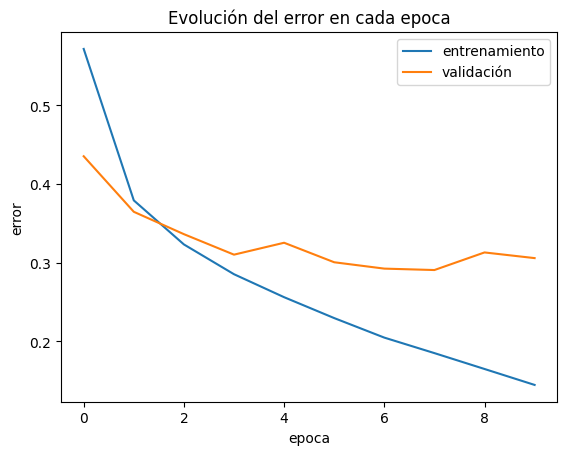

In [14]:
# Grafica de la evolución del error a traves de cada época
# Recuerda que esta gráfica te da la pauta para saber si debes aumentar el numero de epocas, entrenar de nuevo o quedarte con el modelo
plt.plot(M.history['loss'], label = 'entrenamiento')
plt.plot(M.history['val_loss'], label = 'validación')
plt.title('Evolución del error en cada epoca')
plt.legend(loc = 'best')
plt.xlabel('epoca')
plt.ylabel('error')
plt.show()

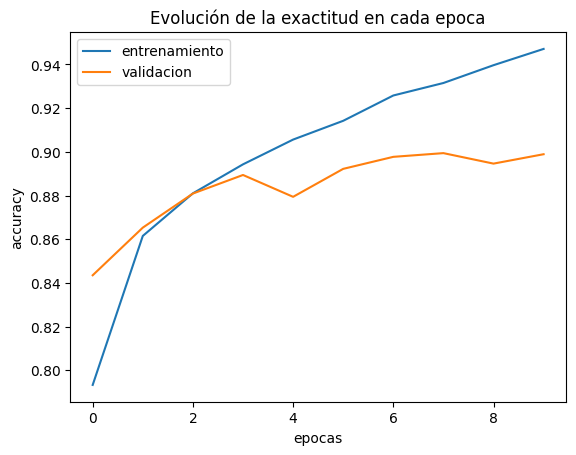

In [15]:
# Grafica de la evolución de la precisión (acc) del modelo a traves de cada época
# Buscamos que el acc del modelo vaya incrementando hasta llegar a 1
plt.plot(M.history['accuracy'], label = 'entrenamiento')
plt.plot(M.history['val_accuracy'], label = 'validacion')
plt.title('Evolución de la exactitud en cada epoca')
plt.legend(loc = 'best')
plt.xlabel('epocas')
plt.ylabel('accuracy')
plt.show()

## Evaluación del modelo
En esta sección realizaremos pruebas sobre el modelo.

1/1 [==============================] - 0s 69ms/step


2024-03-05 22:30:04.676799: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


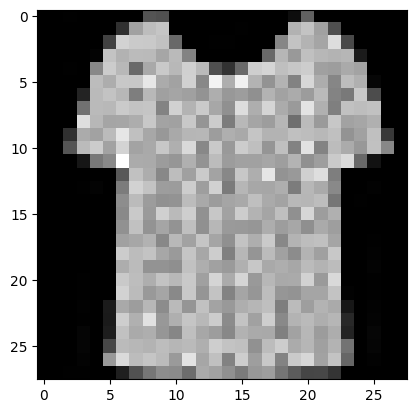

La imagen 1000 pertenece a la clase 0, el modelo la clasifica como: 6
Probabilidades: [[1.0603229e-02 7.7838563e-10 2.1869751e-05 2.8421992e-04 1.2880292e-06
  1.2221931e-08 9.8906040e-01 9.7422725e-10 1.5703082e-09 2.9088302e-05]]


In [16]:
# EJERCICIO
# Elije alguna de las imagenes de test para ejecutar una inferencia  con el modelo
n_imagen = 1000
imagen = x_test[n_imagen]
clasificacion_real = y_test[n_imagen]       # este es el precio real de la casa

# En tensorflow 2.0 ya no aparece el método predict_classes, por lo que utilizaremos predict que devuelve el vector completo
# con 10 elementos y posteriormente utilizando np.argmax encontramos la posición dentro del vector del elemento que tiene el valor
# más grande. Esta posición corresponde con el número de la clase asignada a la imágen.
prediccion = modeloConv.predict(imagen.reshape(1,28,28,1))
clasificacion_modelo = np.argmax(prediccion)

plt.imshow(x_test[n_imagen].reshape(28,28), cmap='gray')   # debemos transformar la imagen a matriz si queremos graficarla
plt.show()

print('La imagen {} pertenece a la clase {}, el modelo la clasifica como: {}'.format(n_imagen, clasificacion_real, clasificacion_modelo))
print('Probabilidades: {}'.format(prediccion))

In [17]:
# Evaluación general
# Esta será una evaluación general del modelo con las imágenes del conjunto de test
# El metodo evaluate devuelve el valor numerico del accuracy o precisión del modelo
# Buscamos que el accuracy este lo más cerca del valor 1
evaluacion = modeloConv.evaluate(x_test, y_test_one_hot)
print('La evaluación del modelo es: ', evaluacion)

2024-03-05 22:30:04.827245: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 7ms/step - loss: 0.3058 - accuracy: 0.8989
La evaluación del modelo es:  [0.30579036474227905, 0.8988999724388123]


## Probando otra imagen

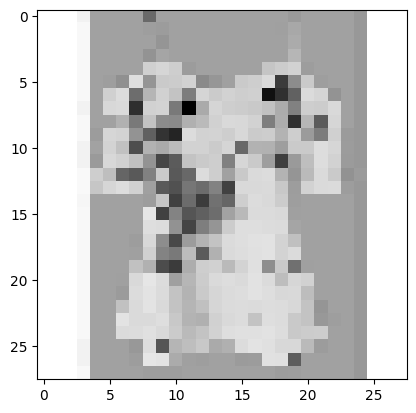

In [18]:
img = np_utils.load_img('blusa.png', target_size=(28, 28), color_mode = 'grayscale')
plt.imshow(img, cmap='gray')
plt.show(img)

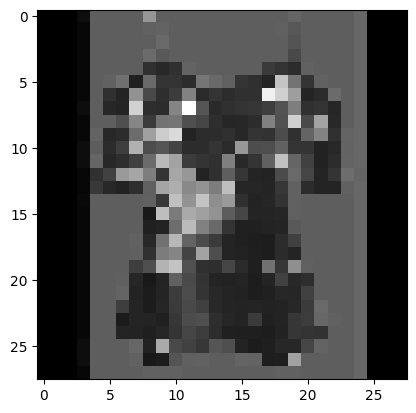

In [19]:
img = np_utils.img_to_array(img)
img = img/255
img = 1 - img
plt.imshow(img.squeeze(), cmap='gray')  # squeeze() is used to remove single-dimensional entries from the shape of an array
plt.show()

In [20]:
prediccion = modeloConv.predict(img.reshape(1,28,28,1))
prediccion

1/1 [==============================] - 0s 10ms/step


array([[8.5674323e-02, 3.2243308e-01, 4.2812634e-01, 3.6080070e-02,
        1.3227057e-02, 2.1599322e-04, 1.0974641e-01, 1.0093705e-04,
        4.3124426e-03, 8.3260245e-05]], dtype=float32)

In [21]:
np.argmax(prediccion)

2